In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import re
from wordcloud import WordCloud
from collections import defaultdict
from textblob import Word
from sklearn.metrics import accuracy_score

In [2]:
# Path to the dataset
zip_path = r'C:\Users\bhard\OneDrive\Desktop\My all Projects\Autocomplete and Autocorrect Data Analytics\archive.zip'
extract_path = r'C:\Users\bhard\OneDrive\Desktop\My all Projects\Autocomplete and Autocorrect Data Analytics'

# Extract the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Load the dataset
data_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
dataset_path = os.path.join(extract_path, data_files[0])

df = pd.read_csv(dataset_path)

In [3]:
# Print column names and shape of the DataFrame
print("Columns in DataFrame:")
print(df.columns.tolist())

print("\nShape of DataFrame:")
print(df.shape)

# Display first few rows
print("\nSample Data:")
print(df.head())

Columns in DataFrame:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Shape of DataFrame:
(284807, 31)

Sample Data:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  

In [5]:
# Data Preparation
# Check if relevant columns have non-null values
df.dropna(subset=['Amount', 'Class'], inplace=True)

# Convert 'Amount' to numeric, handle possible non-numeric values
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Handle possible NaN values after conversion
df.dropna(subset=['Amount'], inplace=True)

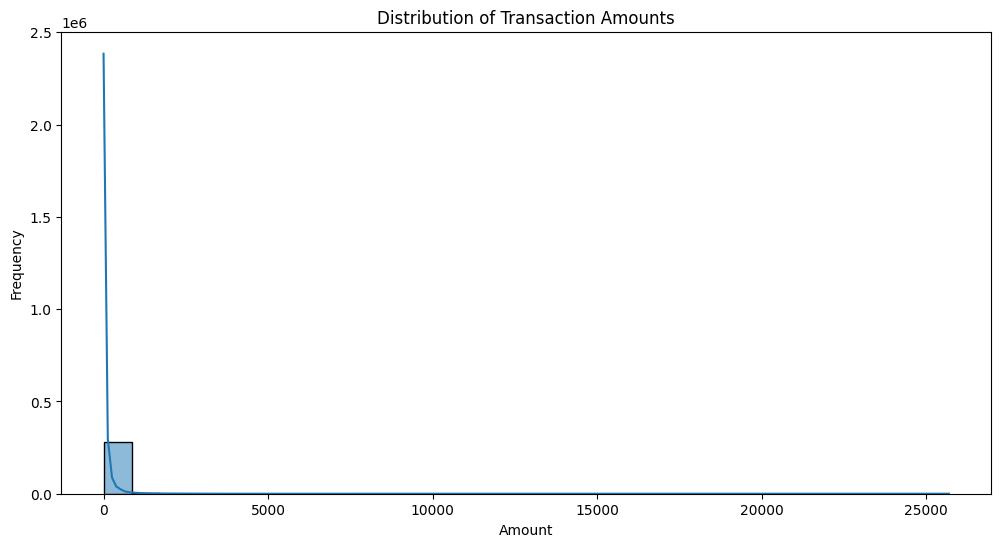

In [6]:
# Basic statistics and exploration
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Autocomplete and Autocorrect Example
# Since the dataset doesn't have text columns, this part is not applicable
# If you had a text column, you would process it like this:

# Autocomplete Example (using Tries)
class TrieNode:
    def __init__(self):
        self.children = defaultdict(TrieNode)
        self.is_end_of_word = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            node = node.children[char]
        node.is_end_of_word = True

    def autocomplete(self, prefix):
        node = self.root
        for char in prefix:
            if char not in node.children:
                return []
            node = node.children[char]
        return self._find_words_with_prefix(node, prefix)

    def _find_words_with_prefix(self, node, prefix):
        results = []
        if node.is_end_of_word:
            results.append(prefix)
        for char, child_node in node.children.items():
            results.extend(self._find_words_with_prefix(child_node, prefix + char))
        return results

In [8]:
# Example usage of Autocomplete
# Assuming you have a text column for autocomplete
# trie = Trie()
# for text in df['text_column']:
#     for word in text.split():
#         trie.insert(word)

# prefix = "auto"
# suggestions = trie.autocomplete(prefix)
# print("Autocomplete suggestions:", suggestions)

# Autocorrect Example (using TextBlob)
def autocorrect_word(word):
    return str(Word(word).correct())

# Apply autocorrect to the text column if it existed
# df['text_corrected'] = df['text_column'].apply(lambda x: ' '.join([autocorrect_word(word) for word in x.split()]))

In [9]:
# Metrics Example (assuming you have a test set for evaluation)
# For demonstration, create dummy true and predicted values
y_true = ['example', 'text', 'for', 'evaluation']
y_pred = ['exaple', 'textt', 'for', 'evluation']

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.25


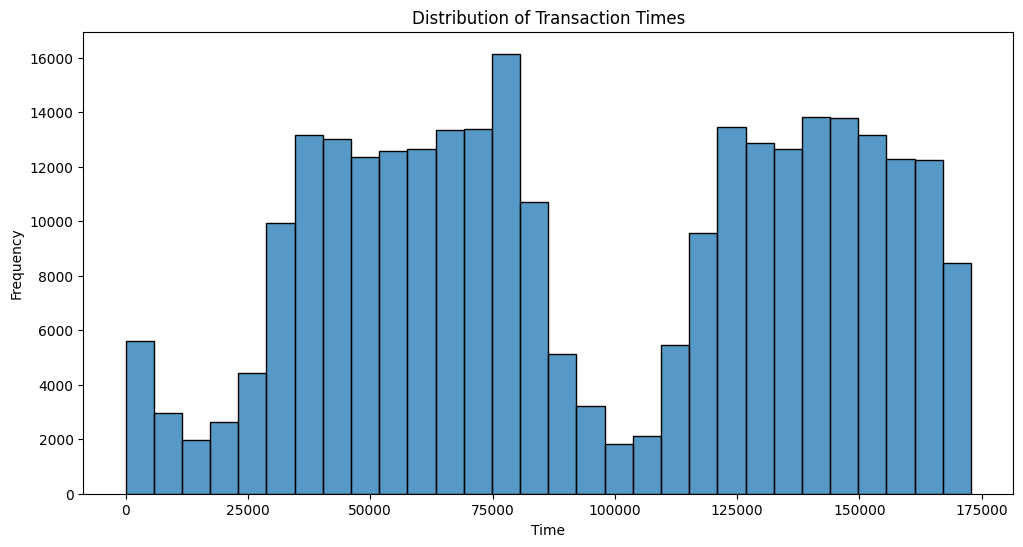

In [10]:
# Visualization
# Example visualization: Distribution of 'Time' if applicable
plt.figure(figsize=(12, 6))
sns.histplot(df['Time'], bins=30)
plt.title('Distribution of Transaction Times')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [11]:
print("Data Analysis Complete.")

Data Analysis Complete.
